In [1]:
################################################################
############# Statistical Programming with R ###################
################################################################

#Session 10
###################################################
################ Linear Regression ################
###################################################
data("women")
women

height,weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


[1] 0.9954948

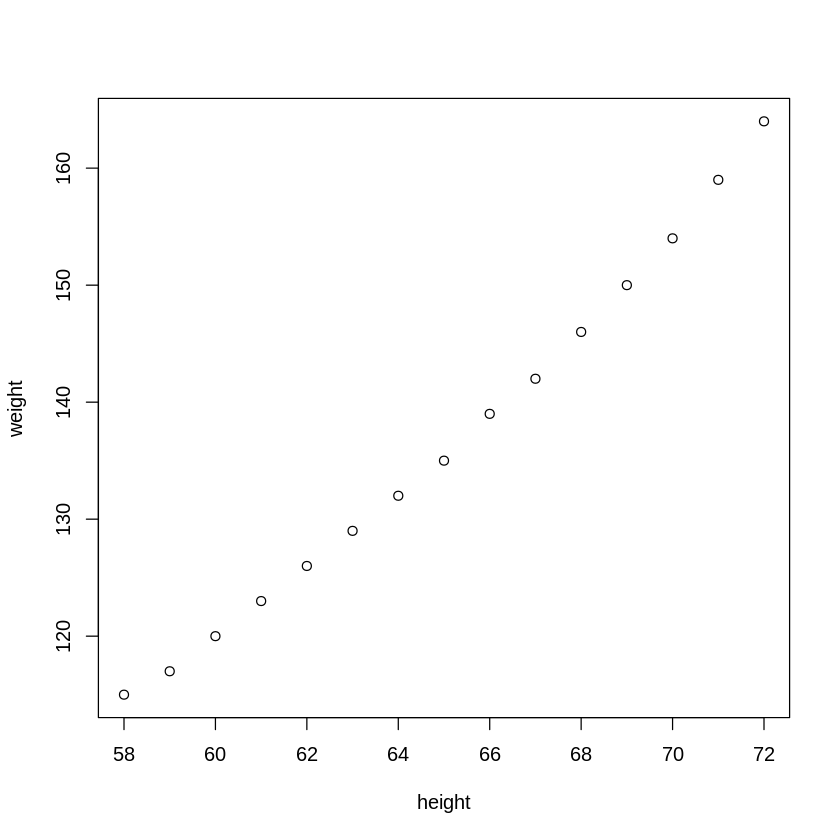

In [2]:
##Bivariate Regression
attach(women)
plot(height, weight)
cor(weight,height)

In [3]:
#Do Regression
lm(weight~height)


Call:
lm(formula = weight ~ height)

Coefficients:
(Intercept)       height  
     -87.52         3.45  


In [4]:
Model1=lm(weight~height)
#Write Equation
abline(Model1)#Add trend line

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [ ]:
#Compute fitted values
Model1$fitted.values

In [ ]:
#Compute residuals


In [ ]:
Model1$residuals
#Add a line for mean of weight (assuming slope is 0, no effect of height)
abline(mean(weight),0, col="Red")
abline(-87.52,3.45, col="Blue")

In [ ]:
#See the desired outputs (coefficients and p-values)
#First, see the output
model_summary=summary(Model1)
names(model_summary)

In [ ]:
#Now extract
model_summary$call #The Model

In [ ]:
model_summary$residuals

In [ ]:
model_summary$coefficients


In [ ]:
model_summary$coefficients[1,1]

In [ ]:
#Extract element
model_summary$df

In [ ]:
model_summary$r.squared

In [ ]:
model_summary$adj.r.squared#Adjusted R-square

In [ ]:
model_summary$fstatistic

In [ ]:
model_summary$fstatistic[1]


In [ ]:
help(pf)

In [ ]:
pf(model_summary$fstatistic[1],model_summary$fstatistic[2],model_summary$fstatistic[3],lower.tail=FALSE)#p-value of F-statistics

In [ ]:
##Alternate ways
resid(model_summary)

In [ ]:
coefficients(model_summary)

In [ ]:
#Predict based on known values
#Syntax(model name, name of the dependent variable in data.frame)
predict(Model1, data.frame(height=60))
#119.4833 (-87.516+3.45*60)

In [ ]:
?predict

In [ ]:
#Predict for more than one value
predict(Model1, data.frame(height=c(60,70,80)))

In [ ]:
(-87.516+3.45*60)
(-87.516+3.45*70)
(-87.516+3.45*80)

In [ ]:
###################################################
###################################################



###################################################
#Diagnostics on residuals
###################################################
#Assumption of normality
x=resid(model_summary)

In [ ]:
x

In [ ]:
#Check mean and median
mean(x)
median(x)

In [ ]:
#A huge difference exist, Hence not normal

mean(y)
median(y)

In [ ]:
hist(x)
boxplot(x)

In [ ]:
shapiro.test(x) #Shapiro-Wilk normality test
#Null hypothesis: Data is normal
#Works when we have large number of datasets

In [ ]:
#Jarque-Bera test
require(mvnormtest)

In [ ]:
jb.norm.test(x)

In [ ]:
#Check by random numbers those are normal
set.seed(1)

In [ ]:
y=rnorm(1000)
jb.norm.test(y)
#Null hypothesis: Data is normal
#joint hypothesis of the skewness being zero and the excess kurtosis being zero

#Plot QQ plots
plot(Model1) #second plot
par(mfrow=c(2,2)) #Make 4 windows
plot(Model1)

In [ ]:
#######################################################
#Assumption of linear relationship
#by plotting residuals vs fitted values
par(mfrow=c(1,1))
plot(Model1$fitted.values,Model1$residuals)

#alternatively
plot(Model1)
#It is not met here
#Some information is still left
##########################################

#Homoscedasticity (The variance of residuals is constant)
plot(height, weight)
abline(Model1)
#The errors are constant around the regression line

#Or we can look at residual vs fitted values
plot(Model1)
###################################


#New example
###################################
data("airquality")
airquality
help(airquality)
#See the characteristics of data by plotting
attach(airquality)
plot(airquality)


#Run the regression, a general model of all possible variables
lm(Ozone~Solar.R+Wind+Temp+Month+Day)
#Assign to an object
model_2=lm(Ozone~Solar.R+Wind+Temp+Month+Day)
summary(model_2)


#Run new model removing the effect of Days
model_3=lm(Ozone~Solar.R+Wind+Temp+Month)
summary(model_3)

###################################################
#Diagnostics on residuals
###################################################
#Assumption of normality
x=resid(model_3)

#Check mean and median
mean(x)
median(x)
#A huge difference exist, Hence not normal

hist(x)
boxplot(x)
shapiro.test(x) #Shapiro-Wilk normality test
#Null hypothesis: Data is normal
#Works when we have large number of datasets

#Jarque-Bera test
require(normtest)
jb.norm.test(x)
#Null hypothesis: Data is normal
#joint hypothesis of the skewness being zero and the excess kurtosis being zero
#######################################################
#Assumption of linear relationship
#by plotting residuals vs fitted values
par(mfrow=c(1,1))
plot(model_3$fitted.values,model_3$residuals)

#alternatively
plot(model_3)
#It is not met here
#Some information is still left
#########################################